<a href="https://colab.research.google.com/github/eddielin0926/kaggle/blob/main/notebooks/house-prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Preparation

In [1]:
! pip install --upgrade pip
! pip install --upgrade kaggle flaml
! pip install git+https://github.com/eddielin0926/myutils.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 6.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.4-py3-none-any.whl size=111926 sha256=c3a472352c70737be1ceaf1ea31fe0b576b6433a3ba88c2232a8ac2a2e3d8e71
  Stored in directory: /root/.cache/pip/wheels/96/ea/6e/1ef402d5911f0536091cd6d9357682c64214efa960eab358b4
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16
  Cloning https://github.com/eddielin0926/myutils.git to /tmp/pip-req-build-641wuq4k
  Running command git clone --filter=blob:none --quie

Set environment variable for kaggle authentication from Colab Secrets.

In [2]:
import os
from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

Set competition name.

In [3]:
COMPETITION = "house-prices-advanced-regression-techniques"

Download competition dataset.

In [4]:
! mkdir -p data
! kaggle competitions download -c {COMPETITION}
! unzip -o {COMPETITION}.zip -d data

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 92.8MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data/data_description.txt  
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


Import libraries.

In [5]:
import pandas as pd
import numpy as np

import myutils

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

Read training and testing dataset.

In [6]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

Submission id and target.

In [7]:
ID = "Id"
TARGET = "SalePrice"

## Exploratory Data Analysis

### Train Dataset

In [8]:
display(df_train.shape)
display(myutils.overview(df_train))

(1460, 81)

,Column,Dtype,Null,Non-Null,Count,Unique,Mode,Mean,Std,Overview,Sample
0,Id,int64,0,1460,1460,1460,1,730.5,421.610009,"[1.0, 365.75, 730.5, 1095.25, 1460.0]",1
1,MSSubClass,int64,0,1460,1460,15,20,56.89726,42.300571,"[20.0, 20.0, 50.0, 70.0, 190.0]",60
2,MSZoning,object,0,1460,1460,5,RL,,,[RL],RL
3,LotFrontage,float64,259,1201,1201,111,60.0,70.049958,24.284752,"[21.0, 59.0, 69.0, 80.0, 313.0]",65.0
4,LotArea,int64,0,1460,1460,1073,7200,10516.828082,9981.264932,"[1300.0, 7553.5, 9478.5, 11601.5, 215245.0]",8450
...,...,...,...,...,...,...,...,...,...,...,...
76,MoSold,int64,0,1460,1460,12,6,6.321918,2.703626,"[1.0, 5.0, 6.0, 8.0, 12.0]",2
77,YrSold,int64,0,1460,1460,5,2009,2007.815753,1.328095,"[2006.0, 2007.0, 2008.0, 2009.0, 2010.0]",2008
78,SaleType,object,0,1460,1460,9,WD,,,[WD],WD
79,SaleCondition,object,0,1460,1460,6,Normal,,,[Normal],Normal


### Test Dataset

In [9]:
display(df_test.shape)
display(myutils.overview(df_test))

(1459, 80)

,Column,Dtype,Null,Non-Null,Count,Unique,Mode,Mean,Std,Overview,Sample
0,Id,int64,0,1459,1459,1459,1461,2190.0,421.321334,"[1461.0, 1825.5, 2190.0, 2554.5, 2919.0]",1461
1,MSSubClass,int64,0,1459,1459,16,20,57.378341,42.74688,"[20.0, 20.0, 50.0, 70.0, 190.0]",20
2,MSZoning,object,4,1455,1455,6,RL,,,[RL],RH
3,LotFrontage,float64,227,1232,1232,116,60.0,68.580357,22.376841,"[21.0, 58.0, 67.0, 80.0, 200.0]",80.0
4,LotArea,int64,0,1459,1459,1106,9600,9819.161069,4955.517327,"[1470.0, 7391.0, 9399.0, 11517.5, 56600.0]",11622
...,...,...,...,...,...,...,...,...,...,...,...
75,MiscVal,int64,0,1459,1459,26,0,58.167923,630.806978,"[0.0, 0.0, 0.0, 0.0, 17000.0]",0
76,MoSold,int64,0,1459,1459,12,6,6.104181,2.722432,"[1.0, 4.0, 6.0, 8.0, 12.0]",6
77,YrSold,int64,0,1459,1459,5,2007,2007.769705,1.30174,"[2006.0, 2007.0, 2008.0, 2009.0, 2010.0]",2010
78,SaleType,object,1,1458,1458,10,WD,,,[WD],WD


### Sale Price

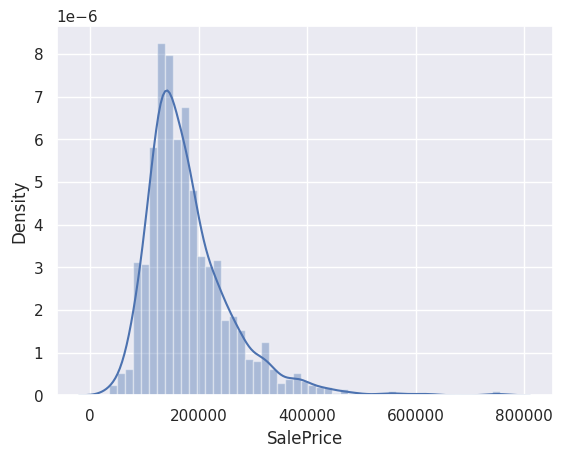

In [10]:
sns.distplot(df_train['SalePrice']);

In [11]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


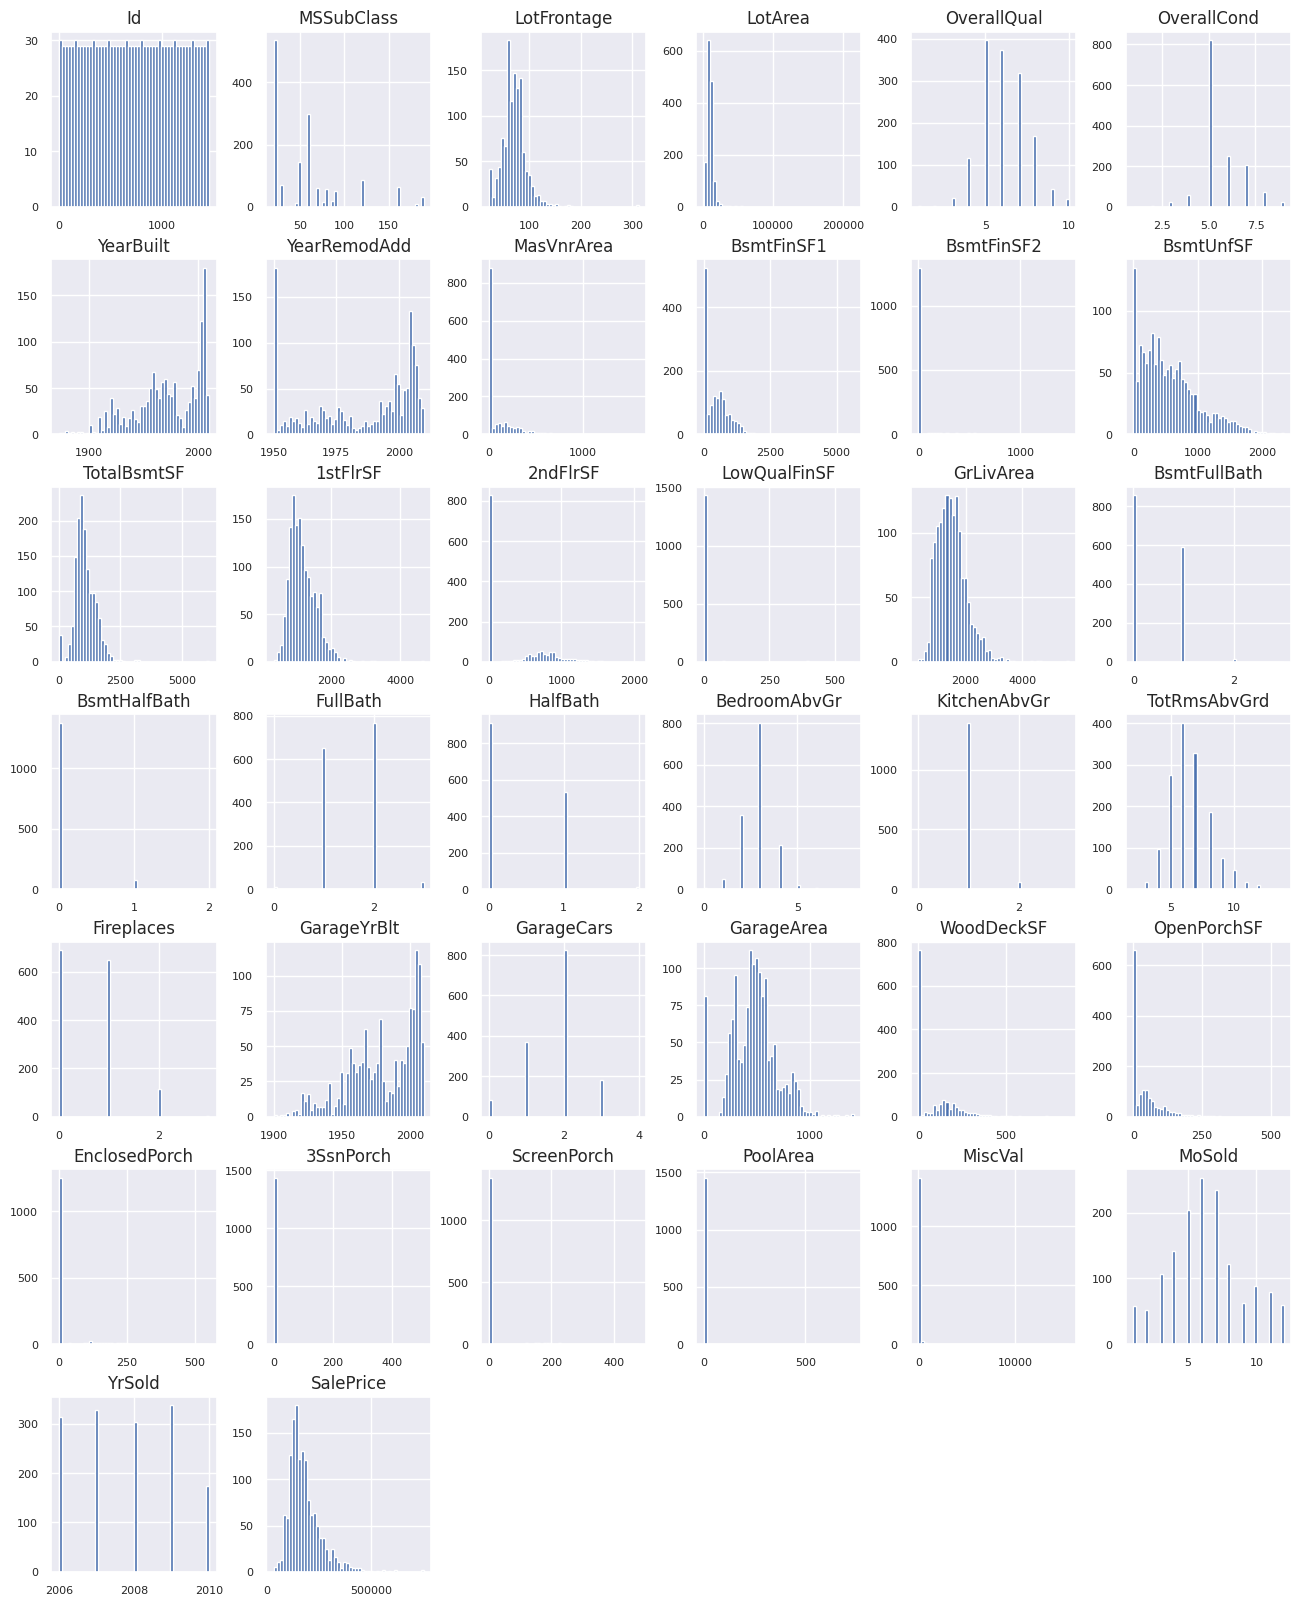

In [12]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Data Preprocessing

### Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encode_cols = []
for col in encode_cols:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    print('Encoding:', col, le.classes_)

In [14]:
train = pd.get_dummies(df_train.drop([], axis=1))
test = pd.get_dummies(df_test.drop([], axis=1))

In [15]:
drop_cols = []
for col, corr in zip(train.corr()[TARGET].index, train.corr()[TARGET]):
    if abs(corr) < 0.2:
        drop_cols.append(col)
print('Dropping cols:', drop_cols)
train = train.drop(drop_cols, axis=1)
test = test.drop(list(set(drop_cols) & set(test.columns)), axis=1)

Dropping cols: ['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'N

<Axes: >

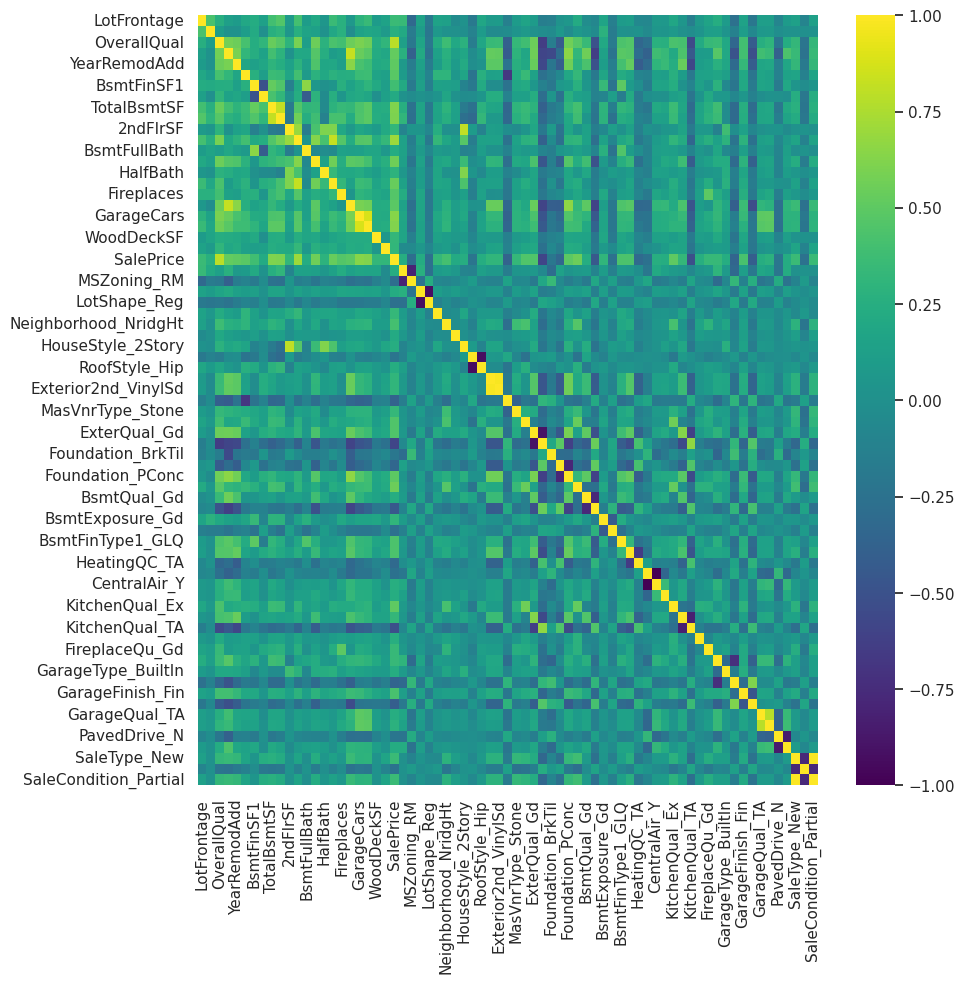

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=False, annot_kws={'size': 8}, vmin=-1, vmax=1, cmap='viridis')

## Training

In [17]:
from flaml import AutoML
from sklearn.ensemble import GradientBoostingRegressor

automl = AutoML()
automl_settings = {
    "task": "regression",
    "time_budget":120,
    "log_file_name": f"{COMPETITION}.log",
    "estimator_list": ['lgbm', 'xgboost', 'xgb_limitdepth', 'rf', 'extra_tree'],
    "metric": "rmse",
    "ensemble": {
        "final_estimator": GradientBoostingRegressor(),
        "passthrough": True,
    },
}
automl.fit(dataframe=train, label=TARGET, **automl_settings)

[flaml.automl.logger: 02-05 18:03:55] {1679} INFO - task = regression
[flaml.automl.logger: 02-05 18:03:55] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 02-05 18:03:55] {1788} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 02-05 18:03:55] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgboost', 'xgb_limitdepth', 'rf', 'extra_tree']
[flaml.automl.logger: 02-05 18:03:55] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 02-05 18:03:55] {2344} INFO - Estimated sufficient time budget=1399s. Estimated necessary time budget=10s.
[flaml.automl.logger: 02-05 18:03:55] {2391} INFO -  at 0.2s,	estimator lgbm's best error=63137.3517,	best estimator lgbm's best error=63137.3517
[flaml.automl.logger: 02-05 18:03:55] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 02-05 18:03:55] {2391} INFO -  at 0.3s,	estimator lgbm's best error=63137.3517,	best estimator lgbm's best error=63137.3517
[flaml.automl.logger: 02-05 18:03:55

In [18]:
from pprint import pprint

print('Best ML leaner:', automl.best_estimator)
print("Best score:", automl.score(train.drop([TARGET], axis=1), train[TARGET]))
print('Best hyperparmeter config:')
pprint(automl.best_config)

Best ML leaner: xgboost
Best score: 0.9834250816455535
Best hyperparmeter config:
{'colsample_bylevel': 0.546076928995204,
 'colsample_bytree': 0.693300745398846,
 'learning_rate': 0.0679979604754336,
 'max_leaves': 29,
 'min_child_weight': 1.435072719611345,
 'n_estimators': 97,
 'reg_alpha': 0.0039597291419529055,
 'reg_lambda': 0.004709558730899651,
 'subsample': 0.9452642648281835}


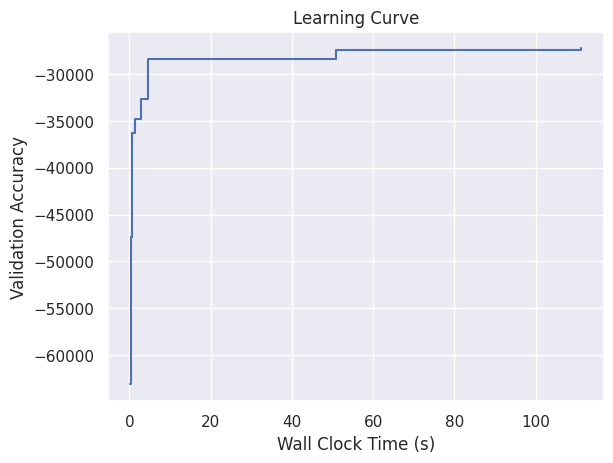

In [19]:
from flaml.automl.data import get_output_from_log

time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)

plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

## Submission

In [20]:
predicted = automl.predict(test)
submission = pd.DataFrame({ID: df_test[ID], TARGET: predicted})
submission.to_csv('./submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,123458.933264
1,1462,151981.171434
2,1463,183465.203969
3,1464,189186.221005
4,1465,179742.835937


In [21]:
! kaggle competitions submit -c {COMPETITION} -f submission.csv -m "Gradient Boosting Regressor"

100% 33.7k/33.7k [00:02<00:00, 16.5kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [24]:
! kaggle competitions submissions {COMPETITION}

fileName        date                 description                  status    publicScore  privateScore  
--------------  -------------------  ---------------------------  --------  -----------  ------------  
submission.csv  2024-02-05 18:06:17  Gradient Boosting Regressor  complete  0.13621                    
submission.csv  2024-02-05 15:56:43  600 secs                     complete  0.13974                    
submission.csv  2024-02-05 15:42:50  Ensemble models              complete  0.14773                    
submission.csv  2024-02-05 14:09:29  Correlation >= 0.5           complete  0.15548                    
submission.csv  2024-01-31 19:33:55  First try                    complete  0.13883                    


## Reference

